<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho 2

As Eleições brasileiras foram marcadas por muitos ataques às urnas eletrônicas e até hoje muitas pessoas não confiam nos resultados das urnas. No entanto, o processo eleitoral brasileiro pode ser considerado o mais moderno do mundo e os resultados são auditáveis e bastante transparentes. Prova disso é a disponibilização dos dados das eleições no site do TSE, os quais podem ser acessados e explorados pelos cientistas de dados para extrair as informações que são de seus interesses.

O Arquivo votacao_secao_2022_RR.csv contém os resultados da eleição estadual no primeiro turno no estado de Roraima. Responda às questões a seguir, que se referem a esses resultados, usando comandos em Python.

1. Abra o arquivo votacao_secao_2022_RR.csv em um Dataframe sabendo que o separador das colunas é o ;
2. Determine quantas seções eleitorais existem no estado de RR.
3. Determine qual candidato a governador recebeu mais votos em uma seção e quantos foram esses votos.
4. Determine quantos candidatos concorreram a deputado federal.
5. Crie um novo DataFrame apenas com os nomes dos candidatos a senador e a quantidade de votos que cada um obteve.
6. Salve esse DataFrame em um arquivo csv.
7. Determine qual foi o senador eleito.
8. Faça um gráfico mostrando os candidatos a senador e os votos em branco e nulos no eixo X e a votação que cada um deles obteve no eixo y. Seu gráfico deve ser de linha ligado por ponto e conter grade no fundo. Seu gráfico deve ter título, legenda, título para o eixo X e título para o eixo Y.
9. Faça um gráfico de pizza mostrando a porcentagem de votos válidos que cada candidato ao senado obteve.
10. Determine quantos candidatos a deputado estadual obtiveram menos de 10 votos.

Obtenção do arquivo.

In [55]:
arquivo_origem = "votacao_secao_2022_RR.zip"
!wget -U "Mozilla" -O arquivo_origem https://github.com/valuedriven/dataanalysis/raw/master/votacao_secao_2022_RR.zip
!unzip -o arquivo_origem


--2022-11-15 13:17:08--  https://github.com/valuedriven/dataanalysis/raw/master/votacao_secao_2022_RR.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/valuedriven/dataanalysis/master/votacao_secao_2022_RR.zip [following]
--2022-11-15 13:17:09--  https://raw.githubusercontent.com/valuedriven/dataanalysis/master/votacao_secao_2022_RR.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6018733 (5.7M) [application/zip]
Saving to: ‘arquivo_origem’

arquivo_origem      100%[===================>]   5.74M  --.-KB/s    in 0.05s   

2022-11-15 13:17:09 (111 MB/s) - ‘arquivo_origem’ saved [6018733/60187

*1*. Abra o arquivo votacao_secao_2022_RR.csv em um Dataframe sabendo que o separador das colunas é o ;

In [ ]:
import pandas as pd
df = pd.read_csv("votacao_secao_2022_RR.csv", sep=';')


2. Determine quantas seções eleitorais existem no estado de RR.

In [48]:
df.groupby('NR_ZONA')["NR_SECAO"].nunique().sum()

1268

3. Determine qual candidato a governador recebeu mais votos em uma seção e quantos foram esses votos.


In [49]:
# zona = int(input("Informe a zona: "))
# secao = int(input("Informe a seção: "))
zona = 1
secao = 610
index = df[(df["NR_ZONA"] == zona) & (df["NR_SECAO"] == secao) & (df["DS_CARGO"] == 'GOVERNADOR') ][['NM_VOTAVEL','QT_VOTOS']]["QT_VOTOS"].idxmax()
df.iloc[[index]][['NM_VOTAVEL', 'QT_VOTOS']]

,NM_VOTAVEL,QT_VOTOS
158480,MARIA TERESA SAENZ SURITA GUIMARÂES,100


4. Determine quantos candidatos concorreram a deputado federal.


In [101]:
# Observação: foram incluídos os votos em partidos. Além disso, são considerados apenas os candidatos com votos.

lista_deputados = df[(df["DS_CARGO"] == 'DEPUTADO FEDERAL')]['NM_VOTAVEL'].drop_duplicates()
len(lista_deputados)


183

5. Crie um novo DataFrame apenas com os nomes dos candidatos a senador e a quantidade de votos que cada um obteve.


In [118]:
lista_senadores = df[(df["DS_CARGO"] == 'SENADOR')]
df_senadores = lista_senadores.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().reset_index()
df_senadores

,NM_VOTAVEL,QT_VOTOS
0,BARTOLOMEU DA SILVA TOMAZ,11171
1,HELDER GIRÃO BARRETO,25554
2,HIRAN MANUEL GONÇALVES DA SILVA,118760
3,ILDERSON PEREIRA SILVA,5542
4,IRAN DE OLIVEIRA MARINHO,2822
5,MAURÍCIO COSTA DA SILVA,1052
6,OZEAS COSTA COLARES JUNIOR,5393
7,ROMERO JUCÁ FILHO,91431
8,TELMARIO MOTA DE OLIVEIRA,19609
9,VOTO BRANCO,10203


6. Salve esse DataFrame em um arquivo csv.


In [119]:
df_senadores.to_csv("lista_senadores.csv")

7. Determine qual foi o senador eleito.


In [120]:
index = df_senadores['QT_VOTOS'].idxmax()
df_senadores.iloc[[index]]

,NM_VOTAVEL,QT_VOTOS
2,HIRAN MANUEL GONÇALVES DA SILVA,118760


8. Faça um gráfico mostrando os candidatos a senador e os votos em branco e nulos no eixo X e a votação que cada um deles obteve no eixo y. Seu gráfico deve ser de linha ligado por ponto e conter grade no fundo. Seu gráfico deve ter título, legenda, título para o eixo X e título para o eixo Y.


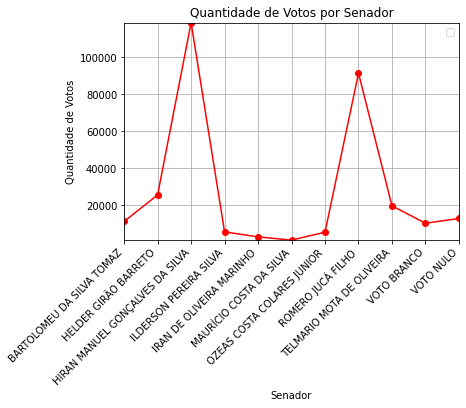

In [142]:
import matplotlib.pyplot as plt

candidatos = df_senadores.NM_VOTAVEL
votos = df_senadores.QT_VOTOS

plt.plot(candidatos, votos, 'ro-')
plt.title("Quantidade de Votos por Senador")
plt.legend()
plt.xlabel('Senador')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Quantidade de Votos')
plt.grid(b='on')
plt.autoscale(enable=True, axis='both', tight=True)
plt.show()

9. Faça um gráfico de pizza mostrando a porcentagem de votos válidos que cada candidato ao senado obteve.


In [144]:
total_votos = df_senadores['QT_VOTOS'].sum()
total_votos

304319

10. Determine quantos candidatos a deputado estadual obtiveram menos de 10 votos.